# 試験結果の分析

1. **量的データの基本統計量**
   - 母集団の分布を確認する。
   - 平均、分散、標準偏差、相関係数などの基本統計量を計算する。
   - 標本抽出し、母平均を推定する（点推定、区間推定）。標本数の例として10, 50, 100, 300などを使用する。

2. **仮説検定**
   - 量的データの検定:
     a. 科目平均の差に意味があるかどうかを検定する（データの対応あり）。
     b. 学生のプロフィールと成績に関係があるかどうかを検定する（データの対応なし）。
   - 名義データの検定:
     - race/ethnicity、parental level of education、lunchの間に関係があるかを検定する。

このNotebookには、量的データの基本統計量の計算、異なる標本サイズに対する点推定と区間推定、および仮説検定のためのセクションが含まれています。
特に、量的データに関する仮説検定の一部として、独立標本（例えば、性別と数学スコア間の関係）に対するt検定を行うためのコードも含まれています。


In [76]:
%pip install ptitprince
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


## データセット `exams.csv` (Large) の読み込み

In [77]:

# Load the dataset
file_path = './data/exams.csv'
exam_data = pd.read_csv(file_path)

# Display the first few rows
exam_data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some college,standard,completed,72,85,83
1,male,group C,high school,standard,completed,39,38,39
2,male,group C,high school,standard,completed,54,53,56
3,female,group A,bachelor's degree,standard,completed,56,64,70
4,male,group C,some college,free/reduced,none,70,72,66


## 1. 量的データの分析
### 1.1 母集団の分布の確認

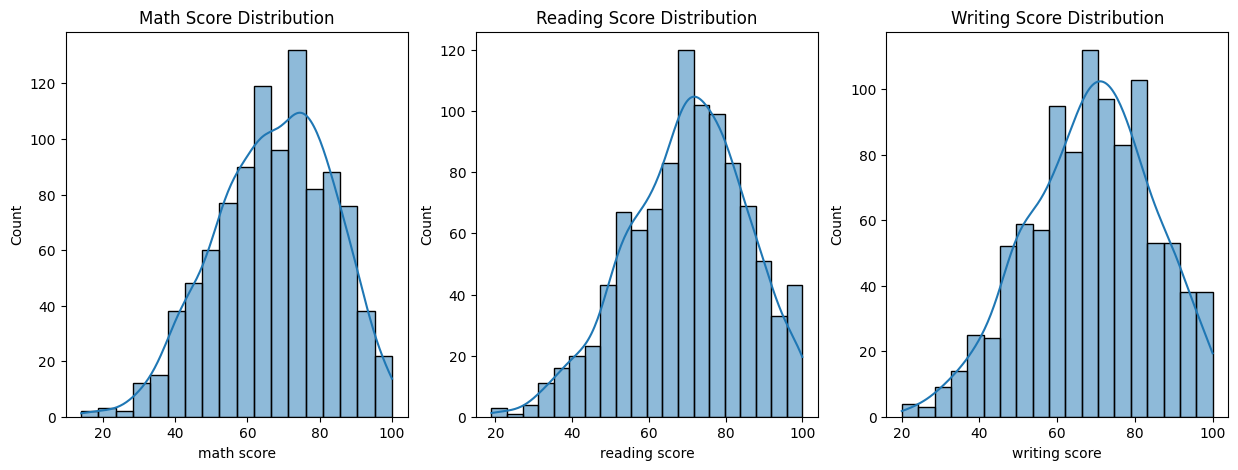

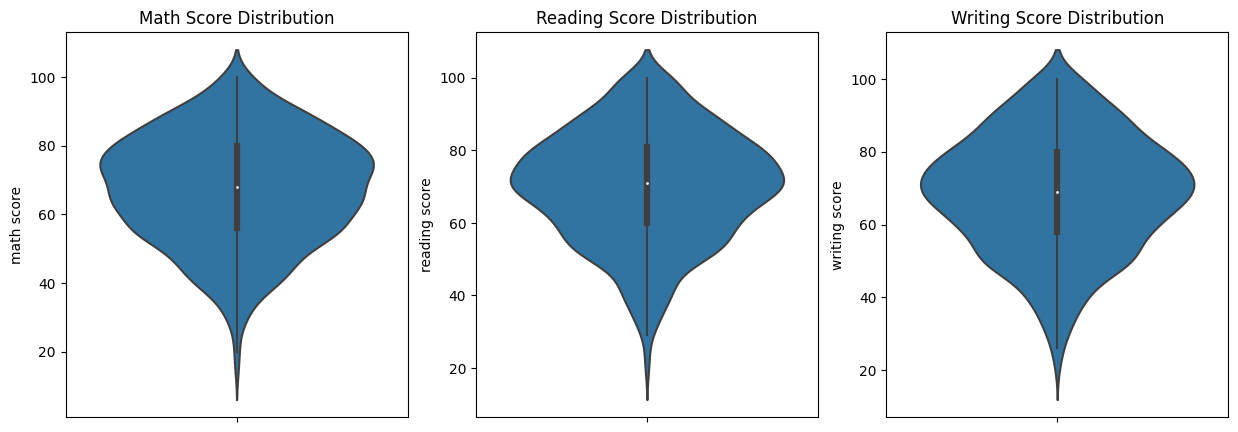

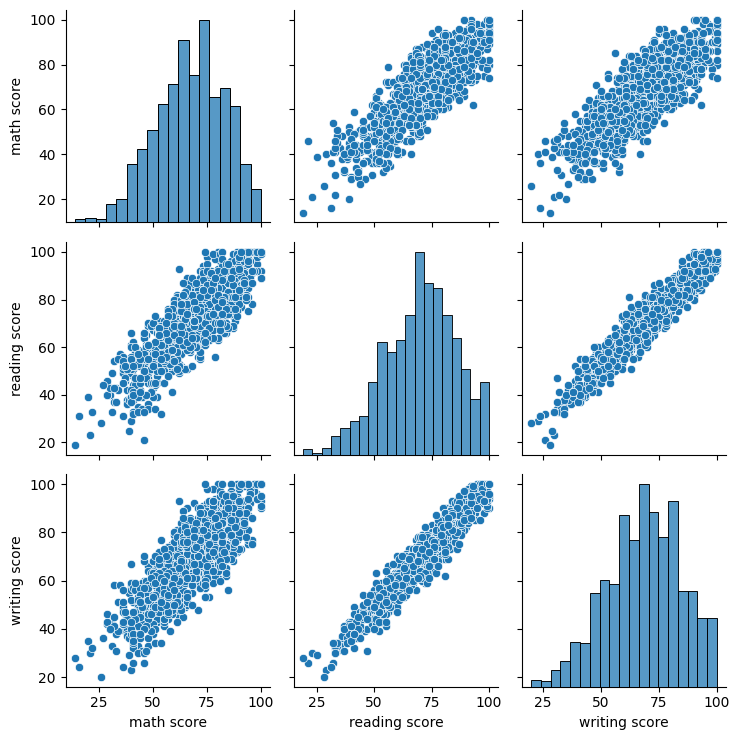

In [78]:

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.histplot(exam_data['math score'], kde=True)
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.histplot(exam_data['reading score'], kde=True)
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.histplot(exam_data['writing score'], kde=True)
plt.title('Writing Score Distribution')


# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=exam_data, y='math score')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=exam_data, y='reading score')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=exam_data, y='writing score')
plt.title('Writing Score Distribution')

sns.pairplot(data=exam_data)

plt.tight_layout()
plt.show()




### 1.2 平均、分散、標準偏差、相関係数などの基本統計量の計算

In [79]:
# Calculate mean, variance, standard deviation, and correlation coefficient
mean_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].mean()).rename(columns={0: '母平均m'})
variance_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].var()).rename(columns={0: '母分散σ^2'})
std_dev_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].std()).rename(columns={0: '母標準偏差σ'})
correlation_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].corr()).rename(columns={0: '母集団の相関係数R'})

# Print the results
print("Mean Scores 母平均m:")
print(mean_scores)
print("\nVariance Scores 母分散σ^2:")
print(variance_scores)
print("\nStandard Deviation Scores 母標準偏差σ:")
print(std_dev_scores)
print("\nCorrelation Scores 母集団の相関係数R:")
print(correlation_scores)


Mean Scores 母平均m:
                 母平均m
math score     67.397
reading score  69.950
writing score  68.576

Variance Scores 母分散σ^2:
                   母分散σ^2
math score     252.930321
reading score  236.411912
writing score  256.993217

Standard Deviation Scores 母標準偏差σ:
                  母標準偏差σ
math score     15.903783
reading score  15.375692
writing score  16.031008

Correlation Scores 母集団の相関係数R:
               math score  reading score  writing score
math score       1.000000       0.832958       0.813456
reading score    0.832958       1.000000       0.954985
writing score    0.813456       0.954985       1.000000


### 1.3 標本の抽出と母平均の推定（点推定、区間推定）

In [80]:
# Function to estimate population mean from a sample
def estimate_population_mean(sample_sizes, confidence_level = 0.95):
    print(f"{confidence_level * 100}%信頼区間で計算します")
    estimates = {}
    for size in sample_sizes:
        sample = exam_data.sample(size)
        estimates[size] = pd.DataFrame()
        for subject in ['math score', 'reading score', 'writing score']:
            sample_mean = sample[subject].mean()
            ci_lower, ci_upper = stats.t.interval(
                confidence_level, 
                len(sample) - 1, 
                loc=sample_mean, 
                scale=stats.sem(sample[subject])
            )
            estimates[size][subject] = pd.Series({
                '母平均m': sample_mean, 
                '下限': ci_lower, 
                '上限': ci_upper
            })
    return estimates

# Sample sizes
sample_sizes = [10, 50, 100, 300]

# Estimate population mean for different sample sizes
estimates = estimate_population_mean(sample_sizes)

# Print the estimates
estimates

95.0%信頼区間で計算します


{10:       math score  reading score  writing score
 母平均m   58.400000      63.000000      61.200000
 下限     48.214988      55.391914      53.129173
 上限     68.585012      70.608086      69.270827,
 50:       math score  reading score  writing score
 母平均m   66.940000       69.50000      67.560000
 下限     62.037561       65.24411      63.194402
 上限     71.842439       73.75589      71.925598,
 100:       math score  reading score  writing score
 母平均m   68.070000      68.930000      67.120000
 下限     64.907521      66.041865      64.020775
 上限     71.232479      71.818135      70.219225,
 300:       math score  reading score  writing score
 母平均m   68.330000      70.990000      69.650000
 下限     66.627176      69.250619      67.838883
 上限     70.032824      72.729381      71.461117}

## 2. 仮説検定
### 2.1 量的データの検定

In [81]:
hypothsis_sample_size = 60
seed = 1232123 # 変えるとサンプルが変わるから変えるな！！！！！！！！！！！！！！！！！！！！！！！！！！！
sample_exam_data = exam_data.sample(hypothsis_sample_size, random_state=seed)
sample_exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
261,male,group B,some college,free/reduced,none,47,48,46
754,male,group D,some college,free/reduced,none,43,33,30
852,female,group D,some high school,standard,none,49,61,61
82,male,group D,associate's degree,free/reduced,none,82,78,80
734,female,group D,some college,standard,none,56,57,62


##### 教科間の関係

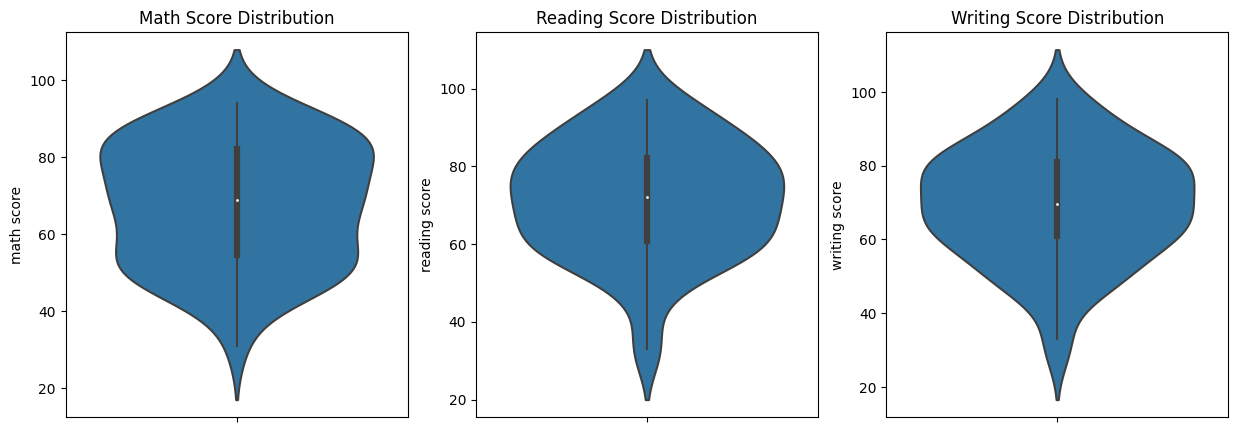

math scoreとreading scoreのt検定
         t値       p値   有意水準  自由度  帰無仮説の採択
0 -2.990395  0.00406  95.0%   59    False


math scoreとwriting scoreのt検定
         t値        p値   有意水準  自由度  帰無仮説の採択
0 -1.100309  0.275667  95.0%   59     True


reading scoreとwriting scoreのt検定
         t値        p値   有意水準  自由度  帰無仮説の採択
0  3.311232  0.001589  95.0%   59    False




In [82]:

# Paired Data Testing (e.g., Math and Reading scores)
# H0: There is no significant difference in the mean scores of two subjects
# H1: There is a significant difference in the mean scores
# Performing paired t-test
def ttest_paired(sample1, sample2, confidence_level=0.95):
    # Calculate the t, p between the samples
    t, p = stats.ttest_rel(sample1, sample2)

    return pd.DataFrame({
        't値': [t],
        'p値': [p],
        '有意水準': [f"{confidence_level * 100}%"],
        '自由度': [len(sample1) - 1],
        '帰無仮説の採択': [p > (1 - confidence_level)] 
    })

score_columns = ['math score', 'reading score', 'writing score']

all_subject_pairs = [(score_columns[i], score_columns[j]) for i in range(len(score_columns)) for j in range(i+1, len(score_columns)) if i != j]

# Perform t-test for all subject pairs

# Plotting distributions of scores
plt.figure(figsize=(15, 5))
# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score')
plt.title('Math Score Distribution')
# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score')
plt.title('Reading Score Distribution')
# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score')
plt.title('Writing Score Distribution')
plt.show()

for subject1, subject2 in all_subject_pairs:
    print(f"{subject1}と{subject2}のt検定")
    print(ttest_paired(sample_exam_data[subject1], sample_exam_data[subject2]))
    print("\n")

有意水準95%の対応ありt検定では、数学`math score`と論述`writing score`の間には有意差は認められなかった。
しかし、数学`math score`と読解`reading score`、読解`reading score`と論述`writing score`の間には有意差が認められた。

#### 対応なしt検定

In [83]:

subjects = ['math score', 'reading score', 'writing score']

# Unpaired Data Testing (e.g., Scores of male and female)
# H0: There is no significant difference in the mean scores of the same subject for two certain groups
# H1: There is a significant difference in the mean scores...
# Performing paired t-test
def ttest_unpaired(sample_df1, sample_df2, confidence_level=0.95):
    # Calculate the t, p between the samples
    t_values = []
    p_values = []
    h0_accepts = []
    for subject in subjects:
        t, p = stats.ttest_ind(sample_df1[subject], sample_df2[subject])
        t_values.append(t)
        p_values.append(p)
        h0_accepts.append(p > (1 - confidence_level))
    return pd.DataFrame({
        't値': t_values,
        'p値': p_values,
        '帰無仮説の採択': h0_accepts 
    }, index=subjects)


##### 性別グループ`gender`

性別グループの間で比較する成績の対応なしt検定


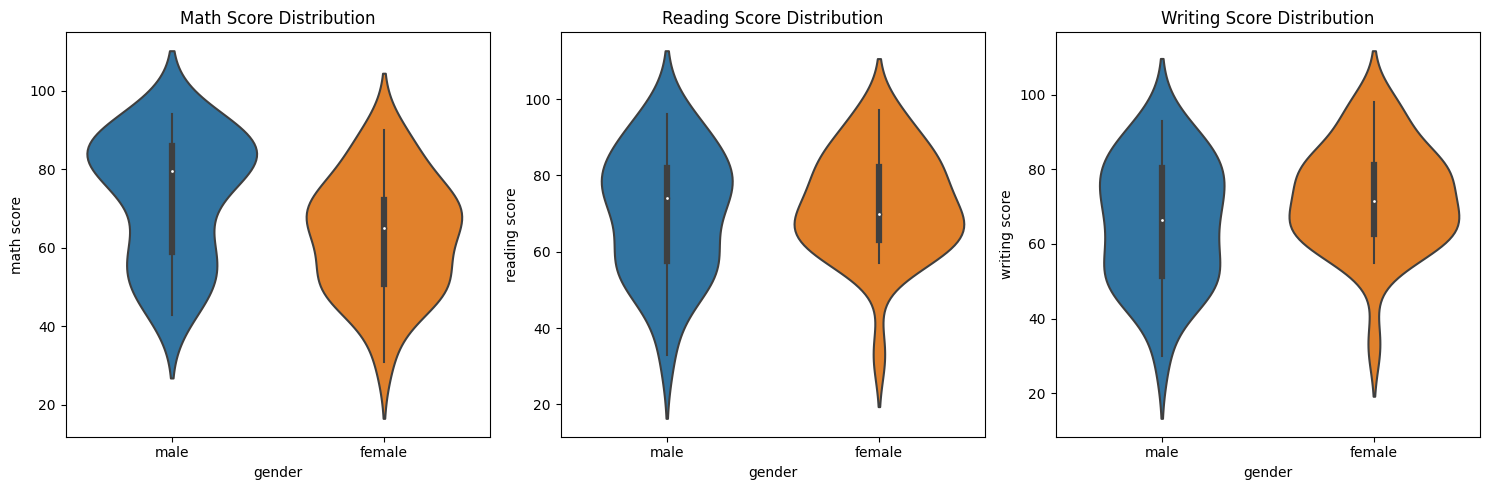

,t値,p値,帰無仮説の採択
math score,2.591923,0.012056,False
reading score,-0.558185,0.578867,True
writing score,-1.733349,0.088347,True


In [84]:
# Perform t-test for all gender groups
print("性別グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', x='gender')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', x='gender',)
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', x='gender')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

sample_male_exam_data = sample_exam_data[sample_exam_data['gender'] == 'male']
sample_female_exam_data = sample_exam_data[sample_exam_data['gender'] == 'female']
gender_ttest_result = ttest_unpaired(sample_male_exam_data, sample_female_exam_data)
gender_ttest_result

性別ごとの成績スコアの差について、有意水準95%の対応なしt検定を行った結果、以下のようになった。
- 数学`math score`: 帰無仮説は棄却され、平均スコアは男性の方が女性よりも高いと言えた。
- 読解`reading score`: 帰無仮説は採択され、男性と女性の間に差は認められなかった。
- 論述`writing score`: 帰無仮説は採択され、男性と女性の間に差は認められなかった。

##### 講義の受講グループ`test preparation course`

講義受講グループの間で比較する成績の対応なしt検定


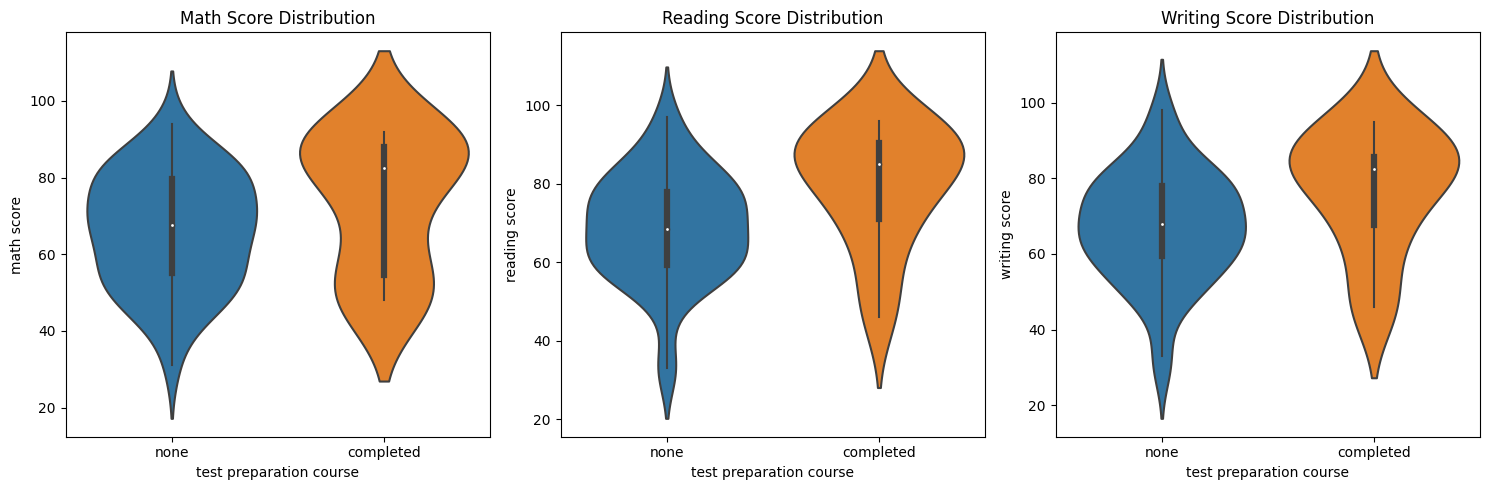

,t値,p値,帰無仮説の採択
math score,1.565592,0.122884,True
reading score,2.559176,0.013123,False
writing score,2.142989,0.036321,False


In [85]:
# Perform t-test for all prep groups
print("講義受講グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', x='test preparation course')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', x='test preparation course')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', x='test preparation course')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

ttest_unpaired(sample_exam_data[sample_exam_data['test preparation course'] == 'completed'], sample_exam_data[sample_exam_data['test preparation course'] == "none"])

講義受講グループごとの成績スコアの差について、有意水準95%の対応なしt検定を行った結果、読解と記述において帰無仮説は棄却され、受講しているグループ`completed`の方が成績が良いと言えた。

##### 給食`lunch`

給食グループの間で比較する成績の対応なしt検定


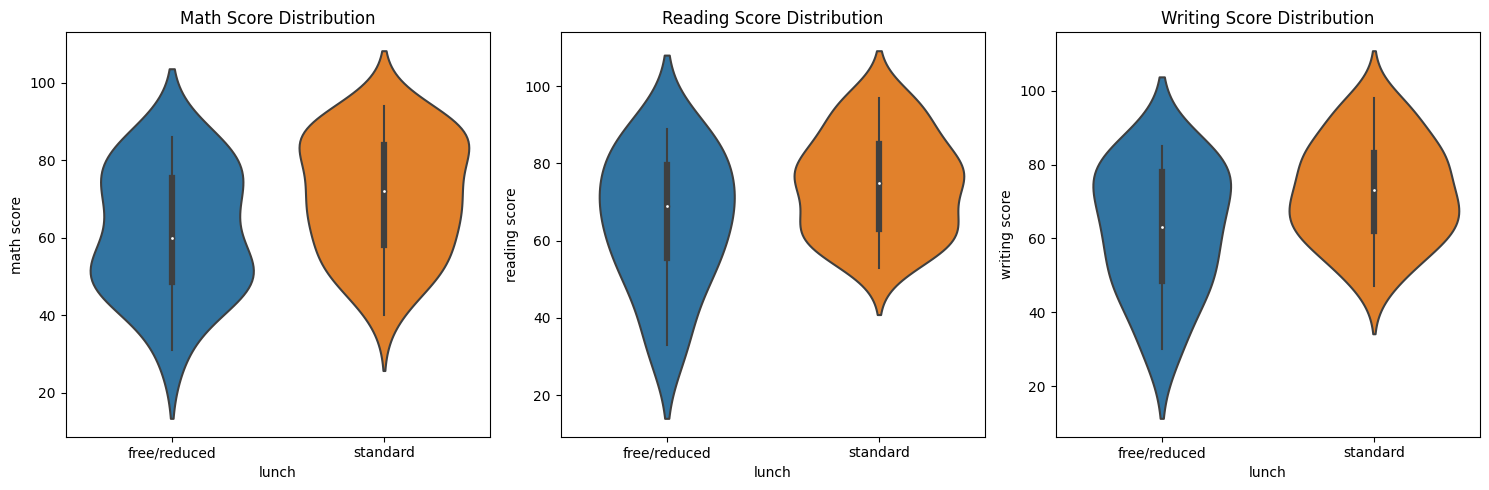

,t値,p値,帰無仮説の採択
math score,2.168579,0.034229,False
reading score,2.312940,0.024293,False
writing score,2.521025,0.014473,False


In [86]:
# Perform t-test for all gender groups
print("給食グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', x='lunch')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', x='lunch')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', x='lunch')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

ttest_unpaired(sample_exam_data[sample_exam_data['lunch'] == 'standard'], sample_exam_data[sample_exam_data['lunch'] == "free/reduced"])

給食グループごとの成績スコアの差について、有意水準95%の対応なしt検定を行った結果、全ての教科において帰無仮説は棄却され、給食を通常通りに購読しているグループ`standard`の方が成績が良いと言えた。

##### 人種グループ`race/ethnicity`

人種グループの間で比較する成績の対応なしt検定


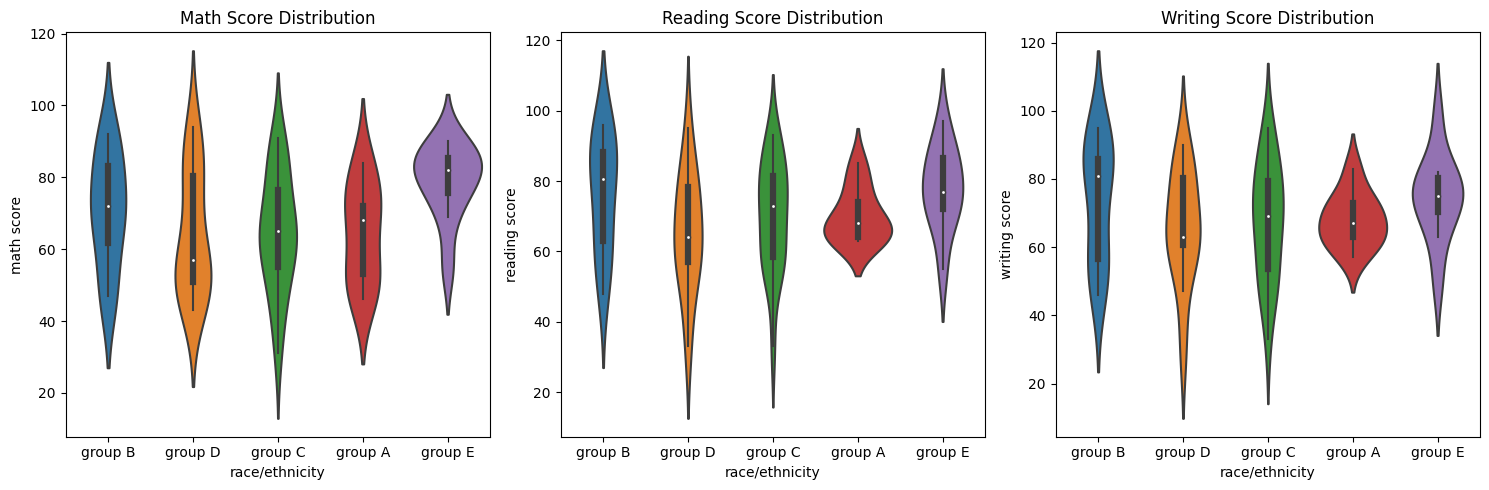



"group A" と "group B" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -0.910765  0.375153     True
reading score -1.033919  0.315659     True
writing score -0.878751  0.391788     True


"group A" と "group C" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -0.038899  0.969268     True
reading score  0.010599  0.991624     True
writing score  0.078834  0.937768     True


"group A" と "group D" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     0.000000  1.000000     True
reading score  0.801860  0.432549     True
writing score  0.387845  0.702441     True


"group A" と "group E" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -2.585231  0.019259    False
reading score -1.676664  0.111899     True
writing score -1.327539  0.201883     True


"group B" と "group C" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     0.954228  0.348434     True
reading score  1.019323  0.317097     True
writing score  0.9

In [87]:
# Perform t-test for all gender groups
print("人種グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', x="race/ethnicity")
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', x="race/ethnicity")
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', x="race/ethnicity")
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

race_groups = ["group A", "group B", "group C", "group D", "group E"]
all_race_group_pairs = [(race_groups[i], race_groups[j]) for i in range(len(race_groups)) for j in range(i+1, len(race_groups)) if i != j]

for (race1, race2) in all_race_group_pairs:
    print(f"\n\n\"{race1}\" と \"{race2}\" の対応なしt検定")
    print(ttest_unpaired(sample_exam_data[sample_exam_data["race/ethnicity"] == race1], sample_exam_data[sample_exam_data["race/ethnicity"] == race2]))

人種ごとの成績スコアの差について、有意水準95%の対応なしt検定を行った結果、数学の教科でのみ、A-E, C-E, D-Eのグループ間に有意差が認められ、グループEの方が成績が良いと言えた。

##### 親の教育レベル`parental level of education`

親の教育レベルグループの間で比較する成績の対応なしt検定


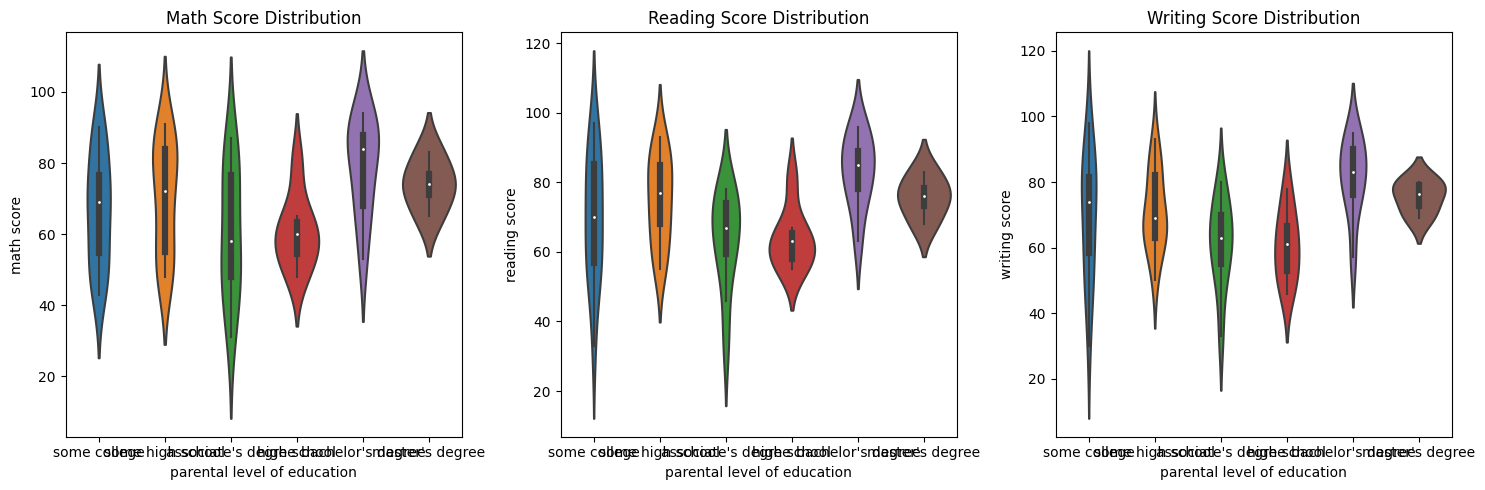



"some high school" と "high school" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     1.455553  0.162736     True
reading score  2.081748  0.051911     True
writing score  1.889920  0.074983     True


"some high school" と "some college" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     0.661106  0.514147     True
reading score  0.848120  0.403828     True
writing score  0.274748  0.785601     True


"some high school" と "associate's degree" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     1.406234  0.173623     True
reading score  2.114622  0.046025    False
writing score  1.885681  0.072612     True


"some high school" と "bachelor's degree" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.315829  0.203115     True
reading score -1.614507  0.122084     True
writing score -2.027748  0.056119     True


"some high school" と "master's degree" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -0.4423

In [88]:
# Perform t-test for all parental level of education groups
print("親の教育レベルグループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', x="parental level of education")
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', x="parental level of education")
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', x="parental level of education")
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

education_groups = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
all_education_group_pairs = [(education_groups[i], education_groups[j]) for i in range(len(education_groups)) for j in range(i+1, len(education_groups)) if i != j]

for (education1, education2) in all_education_group_pairs:
    print(f"\n\n\"{education1}\" と \"{education2}\" の対応なしt検定")
    print(ttest_unpaired(sample_exam_data[sample_exam_data["parental level of education"] == education1], sample_exam_data[sample_exam_data["parental level of education"] == education2]))

以下の結果は、様々な教育レベル間での学業成績に関する対応なしt検定を行ったものである。各検定は有意水準95%で行われた。

- `some high school`と`high school`の比較では、数学、読解、論述のスコアにおいて、帰無仮説が採択され、両グループ間に有意な差は認められなかった。
- `some high school`と`some college`の比較でも、全ての科目で帰無仮説が採択され、差は認められなかった。
- `some high school`と`associate's degree`の比較では、読解スコアのみで帰無仮説が棄却され、`associate's degree`保持者の方がスコアが高いと言えた。他の科目では差は認められなかった。
- `some high school`と`bachelor's degree`、`some high school`と`master's degree`の比較では、全ての科目で帰無仮説が採択され、有意な差は見られなかった。
- `high school`と`some college`、`high school`と`associate's degree`の比較では、全ての科目において帰無仮説が採択され、差は認められなかった。
- `high school`と`bachelor's degree`、`high school`と`master's degree`の比較では、数学、読解、論述のスコアにおいて帰無仮説が棄却され、`bachelor's degree`または`master's degree`保持者の方が高いスコアを示した。
- `some college`と`associate's degree`、`some college`と`bachelor's degree`、`some college`と`master's degree`の比較では、大部分の科目で帰無仮説が採択され、有意な差は認められなかった。ただし、`some college`と`bachelor's degree`の比較では、数学と読解で帰無仮説が採択され、わずかに差がある可能性が示唆されたが、統計的には有意ではなかった。
- `associate's degree`と`bachelor's degree`の比較では、全ての科目で帰無仮説が棄却され、`bachelor's degree`保持者の方が高いスコアを示した。`associate's degree`と`master's degree`、`bachelor's degree`と`master's degree`の比較では、大部分の科目で帰無仮説が採択され、有意な差は見られなかった。

教育レベル間の学業成績を対象とした対応なしt検定の結果は、特定のケースで教育レベルが学業成績に有意な影響を与えていることを示している。具体的には、`bachelor's degree`や`master's degree`を保持する者は、`high school`レベルの者と比較して数学、読解、論述のスコアが高い傾向にあった。


### 2.2 Nominal Data Testing

##### 人種と親の学歴レベル

In [89]:
def chi2_test(col1, col2, confidence_level=0.95):
    # 連関表（クロス集計表）の作成
    contingency_table = pd.crosstab(col1, col2)

    # カイ二乗検定の実施
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # 結果の出力（日本語）
    print("カイ二乗統計量:", chi2)
    print("p値:", p)
    print("自由度:", dof)
    print("期待度数:", expected)
    print("帰無仮説の採択:", p > (1 - confidence_level))

    return contingency_table

In [90]:
chi2_test(sample_exam_data['race/ethnicity'], sample_exam_data['parental level of education'])

カイ二乗統計量: 18.899350405929354
p値: 0.5283767689360094
自由度: 20
期待度数: [[1.65       1.35       1.05       0.6        2.4        1.95      ]
 [1.83333333 1.5        1.16666667 0.66666667 2.66666667 2.16666667]
 [3.48333333 2.85       2.21666667 1.26666667 5.06666667 4.11666667]
 [2.2        1.8        1.4        0.8        3.2        2.6       ]
 [1.83333333 1.5        1.16666667 0.66666667 2.66666667 2.16666667]]
帰無仮説の採択: True


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,1,2,2,0,2,2
group B,1,3,1,1,4,0
group C,5,1,4,1,3,5
group D,3,2,0,0,4,3
group E,1,1,0,2,3,3


有意水準95%でカイ二乗検定を行ったところ、帰無仮説は採択され、関係は認められなかった。

##### 人種と給食

In [91]:
chi2_test(sample_exam_data['race/ethnicity'], sample_exam_data['lunch'])

カイ二乗統計量: 4.1294507127896765
p値: 0.3887699892888749
自由度: 4
期待度数: [[ 2.85        6.15      ]
 [ 3.16666667  6.83333333]
 [ 6.01666667 12.98333333]
 [ 3.8         8.2       ]
 [ 3.16666667  6.83333333]]
帰無仮説の採択: True


lunch,free/reduced,standard
race/ethnicity,,
group A,1,8
group B,5,5
group C,5,14
group D,5,7
group E,3,7


有意水準95%でカイ二乗検定を行ったところ、帰無仮説は採択され、関係は認められなかった。

##### 給食と親の学歴レベル

In [92]:
chi2_test(sample_exam_data['lunch'], sample_exam_data['parental level of education'])

カイ二乗統計量: 1.6652666973591235
p値: 0.8932461797887533
自由度: 5
期待度数: [[ 3.48333333  2.85        2.21666667  1.26666667  5.06666667  4.11666667]
 [ 7.51666667  6.15        4.78333333  2.73333333 10.93333333  8.88333333]]
帰無仮説の採択: True


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,4,2,3,1,6,3
standard,7,7,4,3,10,10


有意水準95%でカイ二乗検定を行ったところ、帰無仮説は採択され、関係は認められなかった。